In [1]:
# I have created a breast cancer classification model and predict the accuracy of this breast cancer classification model. 
# If accuracy is high, it is recommended for the prediction of breast cancer( percentage of Benign and Malignant and percentage of classification report)

# Importing Necessary Libraries

In [187]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Loading and Exploring the Dataset

In [209]:
dataset = pd.read_csv("C:\Sample_Data\data_set.csv")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\aruni\AppData\Local\Temp\ipykernel_31248\845550953.py:1: SyntaxWarning: invalid escape sequence '\S'
  dataset = pd.read_csv("C:\Sample_Data\data_set.csv")


In [211]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [213]:
# Checking the column names in the dataset

dataset.columns

Index(['id        ', 'diagnosis ', 'radius_mean ', 'texture_mean ',
       'perimeter_mean ', 'area_mean ', 'smoothness_mean ',
       'compactness_mean ', 'concavity_mean ', 'concave_points_mean ',
       'symmetry_mean ', 'fractal_dimension_mean ', 'radius_se ',
       'texture_se ', 'perimeter_se ', 'area_se ', 'smoothness_se ',
       'compactness_se ', 'concavity_se ', 'concave_points_se ',
       'symmetry_se ', 'fractal_dimension_se ', 'radius_worst ',
       'texture_worst ', 'perimeter_worst ', 'area_worst ',
       'smoothness_worst ', 'compactness_worst ', 'concavity_worst ',
       'concave_points_worst ', 'symmetry_worst ', 'fractal_dimension_worst'],
      dtype='object')

# Find missing values in a dataset

In [221]:
print(dataset.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# all columns convert into numeric

In [260]:
dataset.columns = dataset.columns.str.upper()

In [262]:
dataset

,ID,DIAGNOSIS,RADIUS_MEAN,TEXTURE_MEAN,PERIMETER_MEAN,AREA_MEAN,SMOOTHNESS_MEAN,COMPACTNESS_MEAN,CONCAVITY_MEAN,CONCAVE_POINTS_MEAN,...,RADIUS_WORST,TEXTURE_WORST,PERIMETER_WORST,AREA_WORST,SMOOTHNESS_WORST,COMPACTNESS_WORST,CONCAVITY_WORST,CONCAVE_POINTS_WORST,SYMMETRY_WORST,FRACTAL_DIMENSION_WORST
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# dataset to numeric

In [268]:
dataset[dataset.select_dtypes(include=['float']).columns] = dataset.select_dtypes(include=['float']).astype(int)

In [270]:
dataset.dtypes

ID                          int64
DIAGNOSIS                  object
RADIUS_MEAN                 int32
TEXTURE_MEAN                int32
PERIMETER_MEAN              int32
AREA_MEAN                   int32
SMOOTHNESS_MEAN             int32
COMPACTNESS_MEAN            int32
CONCAVITY_MEAN              int32
CONCAVE_POINTS_MEAN         int32
SYMMETRY_MEAN               int32
FRACTAL_DIMENSION_MEAN      int32
RADIUS_SE                   int32
TEXTURE_SE                  int32
PERIMETER_SE                int32
AREA_SE                     int32
SMOOTHNESS_SE               int32
COMPACTNESS_SE              int32
CONCAVITY_SE                int32
CONCAVE_POINTS_SE           int32
SYMMETRY_SE                 int32
FRACTAL_DIMENSION_SE        int32
RADIUS_WORST                int32
TEXTURE_WORST               int32
PERIMETER_WORST             int32
AREA_WORST                  int32
SMOOTHNESS_WORST            int32
COMPACTNESS_WORST           int32
CONCAVITY_WORST             int32
CONCAVE_POINTS

# Find a duplicate value in a dataset

In [ ]:
duplicates = dataset[dataset.duplicated()]

# Splitting the Data

In [273]:
from sklearn.model_selection import train_test_split

In [275]:
x = dataset.iloc[:, 2:].values

In [277]:
y = dataset.iloc[:, 1].values

In [279]:
x

array([[ 17,  10, 122, ...,   0,   0,   0],
       [ 20,  17, 132, ...,   0,   0,   0],
       [ 19,  21, 130, ...,   0,   0,   0],
       ...,
       [ 16,  28, 108, ...,   0,   0,   0],
       [ 20,  29, 140, ...,   0,   0,   0],
       [  7,  24,  47, ...,   0,   0,   0]])

In [281]:
y

array(['M         ', 'M         ', 'M         ', 'M         ',
       'M         ', 'M         ', 'M         ', 'M         ',
       'M         ', 'M         ', 'M         ', 'M         ',
       'M         ', 'M         ', 'M         ', 'M         ',
       'M         ', 'M         ', 'M         ', 'B         ',
       'B         ', 'B         ', 'M         ', 'M         ',
       'M         ', 'M         ', 'M         ', 'M         ',
       'M         ', 'M         ', 'M         ', 'M         ',
       'M         ', 'M         ', 'M         ', 'M         ',
       'M         ', 'B         ', 'M         ', 'M         ',
       'M         ', 'M         ', 'M         ', 'M         ',
       'M         ', 'M         ', 'B         ', 'M         ',
       'B         ', 'B         ', 'B         ', 'B         ',
       'B         ', 'M         ', 'M         ', 'B         ',
       'M         ', 'M         ', 'B         ', 'B         ',
       'B         ', 'B         ', 'M         ', 'B    

In [288]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

# Model Selection and Evaluation

In [291]:
# Importing various machine learning models

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [305]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Creating a list of models to evaluate
models = []
models.append(('LDA', LDA()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

# Model Performance Visualization

LDA: 0.940676
LR: 0.936377
KNN: 0.945217
SVC: 0.936473
DT: 0.909758
RF: 0.938502
NB: 0.866087


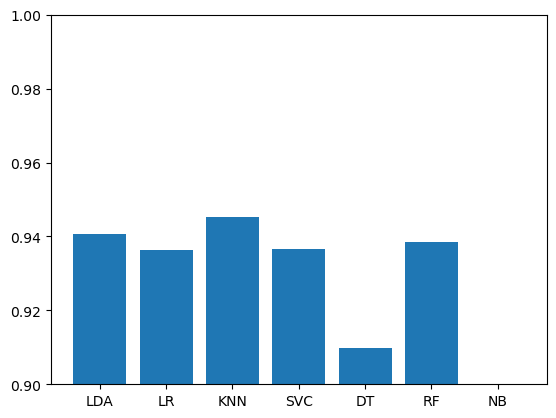

In [307]:
# Initializing lists to store results
results = []
names = []
res = []

for name, model in models:
  kfold = StratifiedKFold(n_splits=10)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

# Plotting the accuracy of each model
plt.ylim(0.90 , 1.00)
plt.bar(names, res)
plt.show()

# 6. Training and Testing with SupportVectorClassifier

In [310]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [312]:
predictions = model.predict(x_test)

# 7. Accuracy score of this model

In [314]:
accuracy_score = accuracy_score(y_test,predictions)

In [316]:
accuracy_score

0.956140350877193